In [87]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [49]:
star = np.loadtxt("test_star.csv", delimiter=",")

In [50]:
# Quick sky estimative and subtraction
borders = np.vstack([star[[0, -1], :], star[:, [0, -1]].T])

sky = borders.mean()

star2 = star.copy() - sky

In [51]:
star2[star2 < 0] = 0  #  Fixing negative pixels

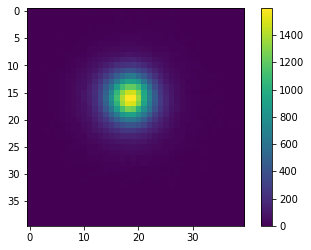

In [70]:
plt.imshow(star2, cmap="viridis")
plt.colorbar()

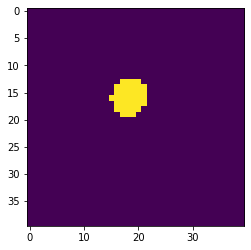

In [71]:
#  Defining half maxima
half_maxima = star2.max()/2

#  Mask to get all values above half maxima
hm_mask = star2 >= half_maxima

plt.imshow(hm_mask)

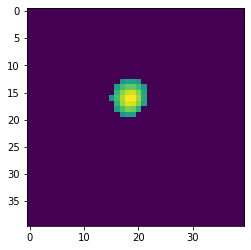

In [68]:
final_star = star2.copy()
final_star[~hm_mask] = 0
fig2, star_shower = plt.subplots()
star_shower.imshow(final_star)

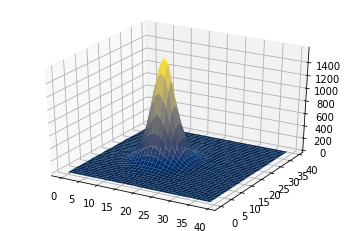

In [58]:
xx, yy = np.mgrid[0:star.shape[0], 0:star.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, star2,rstride=1, cstride=1, cmap=plt.cm.cividis,
        linewidth=0)

# show it
plt.show()

In [59]:
pad = np.zeros( (hm_mask.shape[0], 1) )

# insiders = np.diff(star_mask.cumsum(axis=1), axis=1)
# insiders = np.hstack((pad, insiders))

In [60]:
x, y = np.where(hm_mask)
mstar = hm_mask.copy()
mstar[y, x] = 2
mstar.shape

(40, 40)

<IPython.core.display.Javascript object>


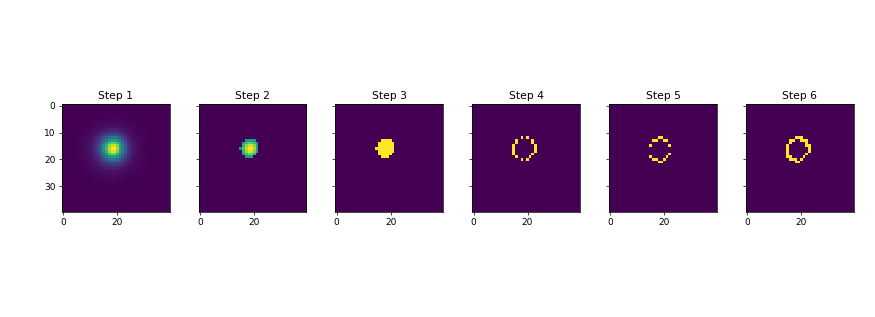

(40, 40)
(40, 40)


In [90]:

fig, s = plt.subplots(1 , 6, sharey=True)

fuuck = np.hstack((pad, np.diff(star_mask, axis=1)))
print(fuuck.shape)

fuuck2 = np.vstack((pad.T, np.diff(star_mask, axis=0)))
print(fuuck2.shape)

fuuck3 = fuuck2 + fuuck
fuuck4 = fuuck3 >= 1

p = [star2, final_star, hm_mask, fuuck, fuuck2, fuuck4]
txt = ["Step 1", "Step 2", "Step 3", "Step 4" ,"Step 5", "Step 6"]

for plot, im, t in zip(p, s, txt):
    im.set_title(t)
    im.imshow(plot)
    

plt.tight_layout()

## References:

- [Astronomical Seeing](http://www.handprint.com/ASTRO/seeing2.html#CCD)
- [Determining a centroid](https://www.astronomyclub.xyz/image-processing/determining-a-centroid.html)
- [Python's Imexam](https://github.com/spacetelescope/imexam)
- [Astropop pipeline](https://github.com/juliotux/astropop)
- [Photutils SourceProperties](https://photutils.readthedocs.io/en/stable/api/photutils.segmentation.SourceProperties.html)